Viewing level 3 with size: (12224, 27648)


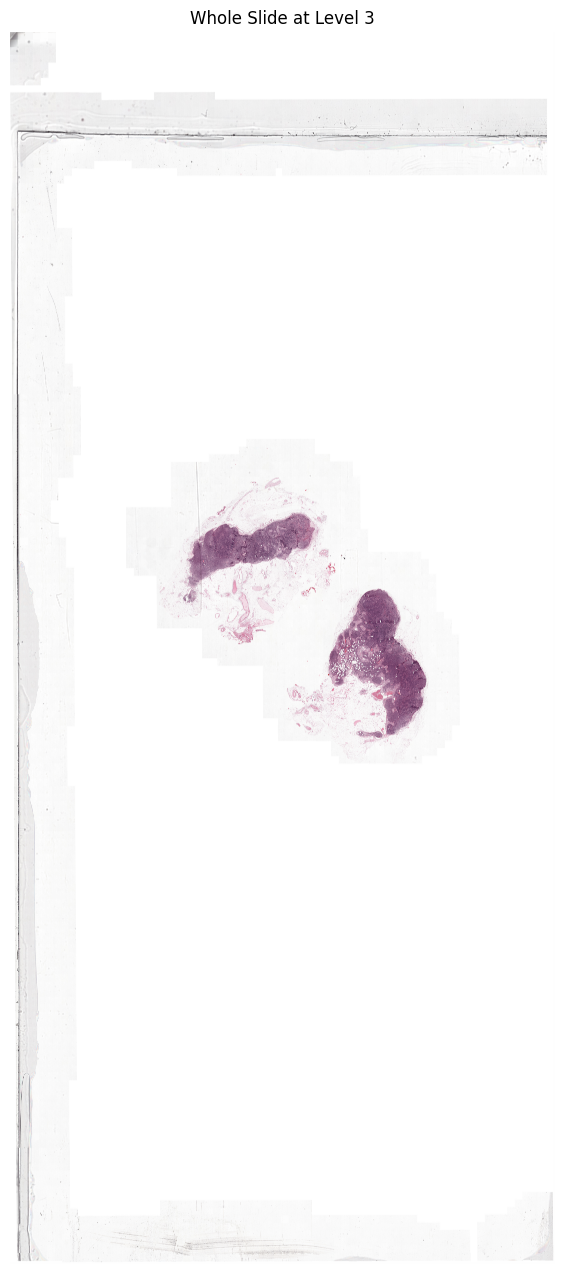

In [ ]:
import openslide
import matplotlib.pyplot as plt

# Path to your .tif image
slide_path = "A:/CAMELYON16/images/normal_001.tif"

# Open the slide
slide = openslide.OpenSlide(slide_path)

# Choose a lower-resolution level (higher index = more downsampled)
level = 3

# Get size at this level
dim = slide.level_dimensions[level]
print(f"Viewing level {level} with size: {dim}")

# Read entire image at this level
thumbnail = slide.read_region((0, 0), level=level, size=dim).convert("RGB")

# Show it
plt.figure(figsize=(16, 16))
plt.imshow(thumbnail)
plt.title(f"Whole Slide at Level {level}")
plt.axis("off")
plt.show()




In [1]:
import numpy as np
f = np.load('data/C16-CLAM/train/features/npz_files/normal_001.npz')
print(f['img_features'].shape) 

(7568, 1024)


In [3]:
import numpy as np
import json

# Load features
feat_path = 'data/C16-CLAM/train/features/npz_files/normal_001.npz'
f = np.load(feat_path)
img_features = f['img_features']
print("Feature shape:", img_features.shape)

# Load clusters
json_path = 'data/C16-CLAM/train/features/npz_files/k-means-10/normal_001.json'
with open(json_path, 'r') as jf:
    clusters = json.load(jf)

print("Number of clusters:", len(clusters))

# Check indices for each cluster
num_patches = img_features.shape[0]
for i, cl in enumerate(clusters):
    if not cl:
        print(f"Cluster {i} is empty.")
        continue
    max_idx = max(cl)
    min_idx = min(cl)
    if max_idx >= num_patches or min_idx < 0:
        print(f"Cluster {i} has out-of-bounds indices! min: {min_idx}, max: {max_idx}")
    print(f"Cluster {i}: {len(cl)} patches, first 5 indices: {cl[:5]}")

# Optionally, check a feature vector for a sample index
sample_cluster = 0
if clusters[sample_cluster]:
    idx = clusters[sample_cluster][0]
    print(f"Sample feature vector from cluster {sample_cluster}, index {idx}:")
    print(img_features[idx][:10])  # print first 10 dims

Feature shape: (7568, 1024)
Number of clusters: 10
Cluster 0: 839 patches, first 5 indices: [743, 758, 762, 789, 807]
Cluster 1: 559 patches, first 5 indices: [33, 153, 179, 181, 182]
Cluster 2: 247 patches, first 5 indices: [29, 672, 693, 713, 714]
Cluster 3: 950 patches, first 5 indices: [682, 703, 726, 728, 736]
Cluster 4: 578 patches, first 5 indices: [11, 14, 15, 17, 18]
Cluster 5: 1256 patches, first 5 indices: [685, 704, 705, 706, 707]
Cluster 6: 1290 patches, first 5 indices: [683, 684, 686, 687, 689]
Cluster 7: 784 patches, first 5 indices: [30, 32, 186, 673, 674]
Cluster 8: 896 patches, first 5 indices: [0, 1, 3, 4, 5]
Cluster 9: 169 patches, first 5 indices: [2, 9, 10, 12, 13]
Sample feature vector from cluster 0, index 743:
[0.05401856 0.10262079 0.00305896 0.03019052 0.00227427 0.00015964
 0.13287902 0.03445355 0.03552737 0.0193445 ]


In [4]:
import numpy as np
import json

# Load features
feat_path = 'data/CAMELYON16-MuRCL/train/features/resnet50/normal_001.npz'
f = np.load(feat_path)
img_features = f['img_features']
print("Feature shape:", img_features.shape)

# Load clusters
json_path = 'data/CAMELYON16-MuRCL/train/features/resnet50/k-means-10/normal_001.json'
with open(json_path, 'r') as jf:
    clusters = json.load(jf)

print("Number of clusters:", len(clusters))

# Check indices for each cluster
num_patches = img_features.shape[0]
for i, cl in enumerate(clusters):
    if not cl:
        print(f"Cluster {i} is empty.")
        continue
    max_idx = max(cl)
    min_idx = min(cl)
    if max_idx >= num_patches or min_idx < 0:
        print(f"Cluster {i} has out-of-bounds indices! min: {min_idx}, max: {max_idx}")
    print(f"Cluster {i}: {len(cl)} patches, first 5 indices: {cl[:5]}")

# Optionally, check a feature vector for a sample index
sample_cluster = 0
if clusters[sample_cluster]:
    idx = clusters[sample_cluster][0]
    print(f"Sample feature vector from cluster {sample_cluster}, index {idx}:")
    print(img_features[idx][:10])  # print first 10 dims

Feature shape: (1937, 2048)
Number of clusters: 10
Cluster 0: 253 patches, first 5 indices: [26, 45, 46, 48, 53]
Cluster 1: 130 patches, first 5 indices: [19, 42, 43, 44, 65]
Cluster 2: 436 patches, first 5 indices: [25, 34, 35, 37, 47]
Cluster 3: 373 patches, first 5 indices: [84, 114, 135, 148, 149]
Cluster 4: 100 patches, first 5 indices: [22, 27, 32, 39, 56]
Cluster 5: 117 patches, first 5 indices: [377, 422, 1028, 1050, 1110]
Cluster 6: 34 patches, first 5 indices: [707, 709, 710, 711, 739]
Cluster 7: 164 patches, first 5 indices: [9, 11, 12, 13, 14]
Cluster 8: 230 patches, first 5 indices: [23, 24, 33, 36, 38]
Cluster 9: 100 patches, first 5 indices: [0, 1, 2, 3, 4]
Sample feature vector from cluster 0, index 26:
[0.32253814 0.         0.01014008 0.         0.         0.
 1.4811318  0.         0.11519078 0.        ]
